# Gene Selection
I believe that a good prediction model can be set up with a handful of genes with strong time trend and low variance.

In [1]:
import pandas as pd
import numpy as np

In [2]:
acf_full_result = pd.read_csv("acf_full_results.tsv", sep='\t', index_col=0)

I limit the selection of representative genes to those that has at least two p values being zero.

In [5]:
pval_mat = acf_full_result.loc[:, [f'Pval_{j}' for j in np.arange(1, 10)]].to_numpy()

In [9]:
significant_filter = np.any(pval_mat == 0, axis=1)
significant_counts = np.sum(pval_mat == 0, axis=1)
np.unique(significant_counts, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([14035,  1209,   486,   247,    80,    14,     1,     3]))

Take a closer look at genes whose autocorrelations for at least two different lags are significant.

In [10]:
acf_subset_result = acf_full_result.loc[significant_counts > 1, :]

In [11]:
acf_subset_result.shape

(831, 45)

In [12]:
lower_bound = acf_subset_result.loc[:, [f'LB_{j}' for j in np.arange(1, 10)]]
upper_bound = acf_subset_result.loc[:, [f'UB_{j}' for j in np.arange(1, 10)]]
# sd = acf_full_result.loc[:, [f'SD_{j}' for j in np.arange(1, 7)]]
mean = acf_full_result.loc[:, [f'Mean_{j}' for j in np.arange(1, 10)]]

In [13]:
lower_bound_mat = lower_bound.to_numpy()
upper_bound_mat = upper_bound.to_numpy()

Count the number of genes with significant correlations at each lag.

In [17]:
significance_mat = np.zeros_like(lower_bound_mat)

In [18]:
significance_mat[lower_bound_mat > 0] = 1
significance_mat[upper_bound_mat < 0] = -1

In [19]:
sum_pos_significant = np.sum(significance_mat > 0, axis=0)
sum_neg_significant = np.sum(significance_mat < 0, axis=0)

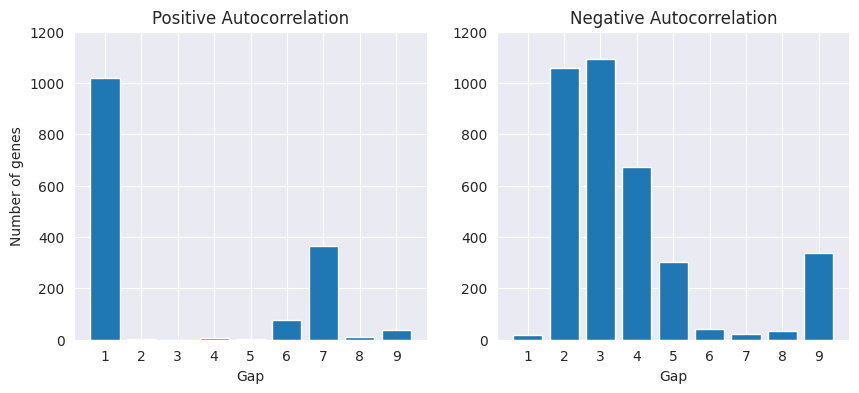

In [133]:
import matplotlib.pyplot as plt
gap = np.arange(1, 10)

fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax1[0].bar(gap, sum_pos_significant)
ax1[0].set_xlabel("Gap")
ax1[0].set_xticks(gap)
ax1[0].set_ylabel("Number of genes")
ax1[0].set_title("Positive Autocorrelation")
ax1[0].set_ylim(0, 1200)

ax1[1].bar(gap, sum_neg_significant)
ax1[1].set_xticks(gap)
ax1[1].set_xlabel("Gap")
# ax1[1].set_ylabel("Number of genes")
ax1[1].set_title("Negative Autocorrelation")
ax1[1].set_ylim(0, 1200)

fig1.savefig("Significant_Autocorrelation", dpi=400, bbox_inches='tight')

I decide to take a look at the genes with the strongest positive autocorrelations at lag 1, 6, 7, 9 and the strongest negative autocorrelations at lag 2,3,4,5,8,9.

In [22]:
pos_genes = np.where(significance_mat[:, 0] > 0)[0]

For genes with positive correlations, I collect those with the highest lower bounds. For genes with negative correlations, I collect those with the lowest upper bound.

In [44]:
pos_1_gene = lower_bound['LB_1'].nlargest(10).index.tolist()
pos_6_gene = lower_bound['LB_6'].nlargest(10).index.tolist()
pos_7_gene = lower_bound['LB_7'].nlargest(10).index.tolist()
pos_9_gene = lower_bound['LB_9'].nlargest(10).index.tolist()

neg_1_gene = upper_bound['UB_1'].nsmallest(10).index.tolist()
neg_2_gene = upper_bound['UB_2'].nsmallest(10).index.tolist()
neg_3_gene = upper_bound['UB_3'].nsmallest(10).index.tolist()
neg_4_gene = upper_bound['UB_4'].nsmallest(10).index.tolist()
neg_5_gene = upper_bound['UB_5'].nsmallest(10).index.tolist()
neg_6_gene = upper_bound['UB_6'].nsmallest(10).index.tolist()
neg_7_gene = upper_bound['UB_7'].nsmallest(10).index.tolist()
neg_8_gene = upper_bound['UB_8'].nsmallest(10).index.tolist()
neg_9_gene = upper_bound['UB_9'].nsmallest(10).index.tolist()
neg_9_gene = upper_bound['UB_9'].nsmallest(10).index.tolist()


In [47]:
iconic_genes = pd.DataFrame({'pos_1': pos_1_gene,
                             'pos_6': pos_6_gene,
                             'pos_7': pos_7_gene,
                             'pos_9': pos_9_gene,
                             'neg_1': neg_1_gene,
                             'neg_2': neg_2_gene,
                             'neg_3': neg_3_gene,
                             'neg_4': neg_4_gene,
                             'neg_5': neg_5_gene,
                             'neg_6': neg_6_gene,
                             'neg_7': neg_7_gene,
                             'neg_8': neg_8_gene,
                             'neg_9': neg_9_gene})

In [50]:
iconic_genes

,pos_1,pos_6,pos_7,pos_9,neg_1,neg_2,neg_3,neg_4,neg_5,neg_6,neg_7,neg_8,neg_9
0,SSMc247520,SSMb160740,SSMa034450,SSMb175930,SSMb154360,SSMc266560,SSMc247520,SSMd288630,SSMa010210,SSMb160620,SSMb199810,SSMd292630,SSMa032870
1,SSMc249330,SSMc272420,SSMd289780,SSMa065860,SSMa062760,SSMc275960,SSMb145820,SSMc250690,SSMb157830,SSMa065860,SSMd290070,SSMa068450,SSMc263030
2,SSMb160740,SSMd299640,SSMa032870,SSMc242460,SSMa115980,SSMa017880,SSMd287800,SSMa068980,SSMa107260,SSMa119160,SSMa073260,SSMd305560,SSMc253350
3,SSMb146180,SSMb147300,SSMb184350,SSMa115980,SSMb175930,SSMc273990,SSMc273990,SSMb160740,SSMb148190,SSMb131130,SSMd307650,SSMb202540,SSMd299640
4,SSMc273990,SSMa029940,SSMb193690,SSMb137510,SSMa019900,SSMa078930,SSMd285900,SSMa011540,SSMd301760,SSMb172340,SSMb131130,SSMd291000,SSMb196580
5,SSMb128980,SSMc247520,SSMb164680,SSMa062760,SSMa065860,SSMc247520,SSMa029940,SSMc258810,SSMc250480,SSMa050990,SSMb196580,SSMb188650,SSMa095690
6,SSMb212810,SSMc285360,SSMa121170,SSMb160620,SSMd288630,SSMb177190,SSMc273180,SSMa052540,SSMd300710,SSMd307650,SSMa100000,SSMb172450,SSMd291000
7,SSMd286150,SSMa080220,SSMb217320,SSMc273990,SSMb199810,SSMc280800,SSMa038740,SSMa099330,SSMb167490,SSMa083510,SSMa059640,SSMa062760,SSMa118140
8,SSMb128990,SSMa075050,SSMa019250,SSMa073720,SSMb202540,SSMa012690,SSMb164680,SSMa063400,SSMa078680,SSMa062760,SSMd290060,SSMa118140,SSMa118330
9,SSMa028150,SSMa052540,SSMc260780,SSMa051510,SSMc266560,SSMa057650,SSMb160740,SSMa108530,SSMc266590,SSMa059640,SSMa083510,SSMd286660,SSMd307120


The marker genes that I select are those which are top ten in at least two columns in the above table.

In [51]:
selected_genes = iconic_genes.to_numpy().flatten()

In [53]:
gene_names, topten_counts = np.unique(selected_genes, return_counts=True)

In [56]:
marker_genes = gene_names[topten_counts > 1]

In [57]:
marker_genes

array(['SSMa029940', 'SSMa032870', 'SSMa052540', 'SSMa059640',
       'SSMa062760', 'SSMa065860', 'SSMa083510', 'SSMa115980',
       'SSMa118140', 'SSMb131130', 'SSMb160620', 'SSMb160740',
       'SSMb164680', 'SSMb175930', 'SSMb196580', 'SSMb199810',
       'SSMb202540', 'SSMc247520', 'SSMc266560', 'SSMc273990',
       'SSMd288630', 'SSMd291000', 'SSMd299640', 'SSMd307650'],
      dtype=object)

Let's visualize some of the genes.

In [58]:
gene_expression_mean = pd.read_csv("gene_expression_mean_cluster.csv", sep='\t', index_col=0)
gene_expression_sd = pd.read_csv("gene_expression_std_cluster.csv", sep='\t', index_col=0)

In [59]:
timepoints = gene_expression_mean.columns[0:12].tolist()

In [61]:
import matplotlib.pyplot as plt

In [62]:
for marker_gene in marker_genes:

    selected_mean = gene_expression_mean.loc[marker_gene, timepoints].to_numpy()
    selected_std = gene_expression_sd.loc[marker_gene, timepoints].to_numpy()
    selected_ac_mean = mean.loc[marker_gene, :].to_numpy()
    selected_ac_lb = lower_bound.loc[marker_gene, :].to_numpy()
    selected_lower_error = selected_ac_mean - selected_ac_lb
    selected_ac_ub = upper_bound.loc[marker_gene, :].to_numpy()
    selected_upper_error = selected_ac_ub - selected_ac_mean

    fig2, ax2=plt.subplots(figsize=(10, 4), nrows=1, ncols=2)

    ax2[0].errorbar(np.arange(1, 13), selected_mean, yerr=selected_std,
                    fmt='-o', color="#344885", capsize=5, alpha=0.7)
    ax2[0].set_xticks(np.arange(1, 13), labels=timepoints)
    ax2[0].set_xlabel('Month')
    ax2[0].set_title(marker_gene)
    ax2[0].set_ylabel('Log Gene Expression(TPM)')

    ax2[1].errorbar(np.arange(1, 10), selected_ac_mean, yerr = np.stack((selected_lower_error, selected_upper_error), axis=0), fmt='-o', color="#344885", capsize=5, alpha=0.7)
    ax2[1].set_xticks(np.arange(1, 10))
    ax2[1].axhline(0, color='r', linestyle='--')
    ax2[1].set_xlabel("Lag")
    ax2[1].set_ylabel("Autocorrelation")
    ax2[1].set_title(marker_gene)

    filename = f'individual_plots/marker_gene/{marker_gene}.png'
    fig2.savefig(filename, dpi=400, bbox_inches='tight')
    plt.close(fig2)


In [65]:
import pickle
with open("marker_genes.pkl", 'wb+') as f:
    pickle.dump(marker_genes, f)